## CALORIES BURNT PREDICTION
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/javierjustin13/calories-burnt-prediction/blob/main/calories-burnt-prediction-v2.ipynb)

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

Data Collection & Processing

In [ ]:
!wget https://raw.githubusercontent.com/javierjustin13/calories-burnt-prediction/main/calories.csv

--2024-07-19 14:35:27--  https://raw.githubusercontent.com/javierjustin13/calories-burnt-prediction/main/calories.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230245 (225K) [text/plain]
Saving to: ‘calories.csv.3’

calories.csv.3      100%[===================>] 224.85K  --.-KB/s    in 0.05s   

2024-07-19 14:35:27 (4.54 MB/s) - ‘calories.csv.3’ saved [230245/230245]



In [ ]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [ ]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
!wget https://raw.githubusercontent.com/javierjustin13/calories-burnt-prediction/main/exercise.csv

--2024-07-19 14:35:27--  https://raw.githubusercontent.com/javierjustin13/calories-burnt-prediction/main/exercise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553447 (540K) [text/plain]
Saving to: ‘exercise.csv.3’

exercise.csv.3      100%[===================>] 540.48K  --.-KB/s    in 0.07s   

2024-07-19 14:35:28 (7.78 MB/s) - ‘exercise.csv.3’ saved [553447/553447]



In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,NaN,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,NaN,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      14996 non-null  float64
 4   Weight      14995 non-null  float64
 5   Duration    14978 non-null  float64
 6   Heart_Rate  14848 non-null  float64
 7   Body_Temp   14865 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
calories_data.isnull().sum()

User_ID         0
Gender          0
Age             0
Height          4
Weight          5
Duration       22
Heart_Rate    152
Body_Temp     135
Calories        0
dtype: int64

Data Analysis

In [ ]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,14996.000000,14995.000000,14978.000000,14848.000000,14865.000000,15000.000000
mean,1.497736e+07,42.789800,174.466858,74.967456,15.536253,95.518588,40.024406,89.539533
std,2.872851e+06,16.980264,14.259507,15.034108,8.318342,9.579102,0.779444,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
mean_value = calories_data['Height'].mean()
std_dev = calories_data['Height'].std()
threshold = 2  # Adjust this threshold as needed

# Filter out values beyond the threshold
calories_data = calories_data[(calories_data['Height'] >= mean_value - threshold * std_dev) & (calories_data['Height'] <= mean_value + threshold * std_dev)]

In [ ]:
calories_data['Duration'] = calories_data.groupby(['Gender'])['Duration'].transform(lambda x: x.fillna(x.mean()))
calories_data['Heart_Rate'] = calories_data.groupby(['Gender'])['Heart_Rate'].transform(lambda x: x.fillna(x.mean()))
calories_data['Body_Temp'] = calories_data.groupby(['Gender'])['Body_Temp'].transform(lambda x: x.fillna(x.mean()))

<ipython-input-15-39430bd79499>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_data['Duration'] = calories_data.groupby(['Gender'])['Duration'].transform(lambda x: x.fillna(x.mean()))
<ipython-input-15-39430bd79499>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_data['Heart_Rate'] = calories_data.groupby(['Gender'])['Heart_Rate'].transform(lambda x: x.fillna(x.mean()))
<ipython-input-15-39430bd79499>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
# menghapus sisa data yang null
calories_data = calories_data.dropna()

In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14500 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     14500 non-null  int64  
 1   Gender      14500 non-null  object 
 2   Age         14500 non-null  int64  
 3   Height      14500 non-null  float64
 4   Weight      14500 non-null  float64
 5   Duration    14500 non-null  float64
 6   Heart_Rate  14500 non-null  float64
 7   Body_Temp   14500 non-null  float64
 8   Calories    14500 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


Converting the text data to numerical values

1. Positive Correlation
2. Negative Correlation

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
correlation = calories_data.corr()

<Axes: >

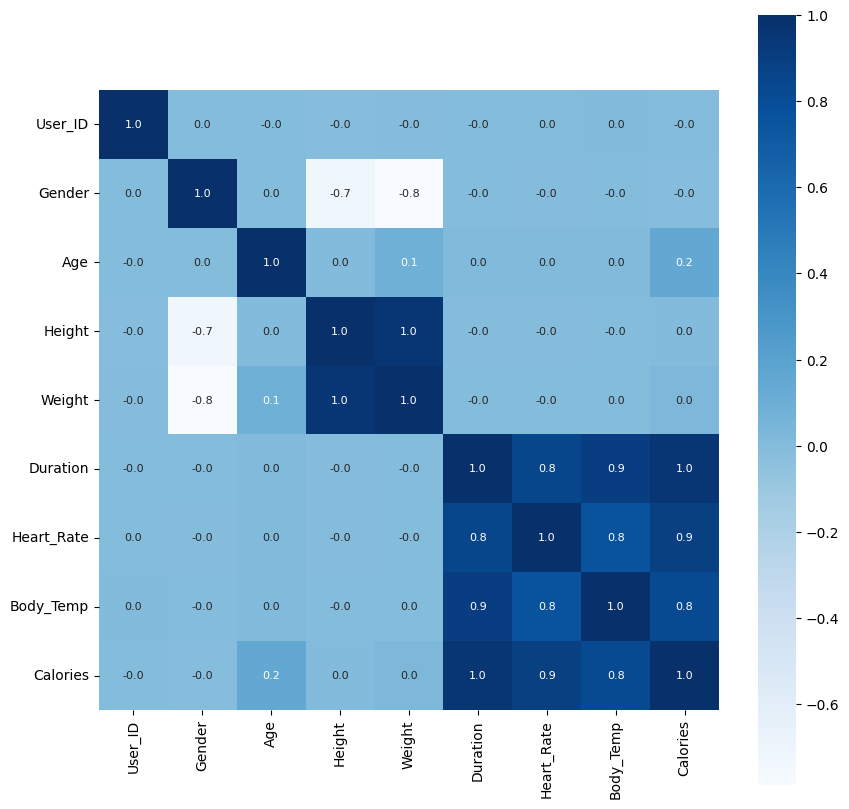

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.000000,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,95.465033,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.000000,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.000000,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.000000,39.8,35.0


Separating features and Target

In [ ]:
X = calories_data[['Duration', 'Body_Temp', 'Heart_Rate']]
Y = calories_data['Calories']

In [ ]:
print(X)

       Duration  Body_Temp  Heart_Rate
0          29.0       40.8  105.000000
1          14.0       40.3   95.465033
2           5.0       38.7   88.000000
3          13.0       40.5  100.000000
4          10.0       39.8   81.000000
...         ...        ...         ...
14995      11.0       40.4   92.000000
14996       6.0       39.2   85.000000
14997      16.0       40.1   90.000000
14998       2.0       38.3   84.000000
14999      18.0       40.5   92.000000

[14500 rows x 3 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 14500, dtype: float64


Splitting the data into training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(14500, 3) (11600, 3) (2900, 3)


Model Training

In [ ]:
# loading the model
modelXGB = XGBRegressor(n_estimators=200, max_depth=2)
modelGBR = GradientBoostingRegressor(n_estimators=100, max_depth=3)
modelLinear = LinearRegression()
modelRF = RandomForestRegressor()
modelAda = AdaBoostRegressor()
modelExtraTrees = ExtraTreesRegressor()
# Stacking
estimators = [
    ('gbr', GradientBoostingRegressor(n_estimators=100, max_depth=3)),
    ('rf', RandomForestRegressor())
]
modelStacking = StackingRegressor(estimators=estimators,
    final_estimator=XGBRegressor(n_estimators=200, max_depth=2))

Finding best parameters for XGBoost Regressor using Grid Search

In [ ]:
# #menentukan nilai parameter untuk dilakukan Cross Validation
# parameter = {'max_depth': [2, 3, 4, 5],
#              'n_estimators': [50, 100, 150, 200]}

# #mencari kombinasi terbaik dari parameter yang telah ditentukan sebelumnya
# search = GridSearchCV(modelXGB, parameter, cv=5)
# search.fit(X_train, Y_train)

# print('Best Result: ', search.best_params_)
# print('Best Score : ', search.best_score_)

Finding best parameters for Gradient Boosting Regressor using Grid Search

In [ ]:
# parameter = {'max_depth': [2, 3, 4, 5],
#              'n_estimators': [50, 100, 150, 200]}

# search = GridSearchCV(modelGBR, parameter, cv=5)
# search.fit(X_train, Y_train)

# print('Best Result: ', search.best_params_) # untuk n_estimators tidak kami ikuti sesuai best score karena menyebabkan overfitting
# print('Best Score : ', search.best_score_)

In [ ]:
# training the model with X_train
modelXGB.fit(X_train, Y_train)
modelGBR.fit(X_train, Y_train)
modelLinear.fit(X_train, Y_train)
modelRF.fit(X_train, Y_train)
modelAda.fit(X_train, Y_train)
modelExtraTrees.fit(X_train, Y_train)
modelStacking.fit(X_train, Y_train)

StackingRegressor(estimators=[('gbr', GradientBoostingRegressor()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=2,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=200, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...))

Evaluation

Prediction on Test Data

In [ ]:
test_data_predictionXGB = modelXGB.predict(X_test)
train_data_predictionXGB = modelXGB.predict(X_train)

test_data_predictionGBR = modelGBR.predict(X_test)
train_data_predictionGBR = modelGBR.predict(X_train)

test_data_predictionLinear = modelLinear.predict(X_test)
train_data_predictionLinear = modelLinear.predict(X_train)

test_data_predictionRF = modelRF.predict(X_test)
train_data_predictionRF = modelRF.predict(X_train)

test_data_predictionAda = modelAda.predict(X_test)
train_data_predictionAda = modelAda.predict(X_train)

test_data_predictionExtraTrees = modelExtraTrees.predict(X_test)
train_data_predictionExtraTrees = modelExtraTrees.predict(X_train)

test_data_predictionStacking = modelStacking.predict(X_test)
train_data_predictionStacking = modelStacking.predict(X_train)

In [ ]:
print(test_data_predictionXGB)
print(test_data_predictionGBR)
print(test_data_predictionLinear)
print(test_data_predictionRF)
print(test_data_predictionAda)
print(test_data_predictionExtraTrees)
print(test_data_predictionStacking)

[ 57.77227  113.68244   58.675945 ...  63.31574  121.264175 167.14594 ]
[ 56.56427562 107.82986304  57.46540347 ...  60.18514621 122.27907494
 166.01240296]
[ 63.66358611 113.04813613  65.77003532 ...  64.85087131 117.64280448
 162.89128826]
[ 55.75278122 112.66073413  62.47996429 ...  63.63633333 117.5728254
 162.25667244]
[ 59.11734694 111.130962    57.81273131 ...  63.96819196 138.00625
 178.72952381]
[ 56.         110.21333333  64.         ...  63.725      119.
 162.        ]
[ 57.62196  107.05657   58.09823  ...  59.543198 118.69285  167.65    ]


Mean Absolute Error

In [ ]:
maeXGB = metrics.mean_absolute_error(Y_test, test_data_predictionXGB)
maeGBR = metrics.mean_absolute_error(Y_test, test_data_predictionGBR)
maeLinear = metrics.mean_absolute_error(Y_test, test_data_predictionLinear)
maeRF = metrics.mean_absolute_error(Y_test, test_data_predictionRF)
maeAda = metrics.mean_absolute_error(Y_test, test_data_predictionAda)
maeExtraTrees = metrics.mean_absolute_error(Y_test, test_data_predictionExtraTrees)
maeStacking = metrics.mean_absolute_error(Y_test, test_data_predictionStacking)

In [ ]:
print("MAE XGB = ", maeXGB)
print("MAE GBR = ", maeGBR)
print("MAE Linear = ", maeLinear)
print("MAE RandomForest = ", maeRF)
print("MAE Ada = ", maeAda)
print("MAE ExtraTrees = ", maeExtraTrees)
print("MAE Stacking = ", maeStacking)

MAE XGB =  8.49431176037624
MAE GBR =  8.540634594679135
MAE Linear =  10.924100199218447
MAE RandomForest =  9.499797788999674
MAE Ada =  12.193868515173813
MAE ExtraTrees =  9.840939126744905
MAE Stacking =  8.647723818483025


Mean Squared Error

In [ ]:
mseXGB = metrics.mean_squared_error(Y_test, test_data_predictionXGB)
mseGBR = metrics.mean_squared_error(Y_test, test_data_predictionGBR)
mseLinear = metrics.mean_squared_error(Y_test, test_data_predictionLinear)
mseRF = metrics.mean_squared_error(Y_test, test_data_predictionRF)
mseAda = metrics.mean_squared_error(Y_test, test_data_predictionAda)
mseExtraTrees = metrics.mean_squared_error(Y_test, test_data_predictionExtraTrees)
mseStacking = metrics.mean_squared_error(Y_test, test_data_predictionStacking)

In [ ]:
print("MSE XGB = ", mseXGB)
print("MSE GBR = ", mseGBR)
print("MSE Linear = ", mseLinear)
print("MSE RandomForest = ", mseRF)
print("MSE Ada = ", mseAda)
print("MSE ExtraTrees = ", mseExtraTrees)
print("MSE Stacking = ", mseStacking)

MSE XGB =  159.6424878637154
MSE GBR =  160.38056437270376
MSE Linear =  234.28317433207
MSE RandomForest =  196.23108139203717
MSE Ada =  244.10352806292073
MSE ExtraTrees =  212.4815762446571
MSE Stacking =  167.83148177727762


Root Mean Squared Error

In [ ]:
rmseXGB = np.sqrt(mseXGB)
rmseGBR = np.sqrt(mseGBR)
rmseLinear = np.sqrt(mseLinear)
rmseRF = np.sqrt(mseRF)
rmseAda = np.sqrt(mseAda)
rmseExtraTrees = np.sqrt(mseExtraTrees)
rmseStacking = np.sqrt(mseStacking)

In [ ]:
print("RMSE XGB = ", rmseXGB)
print("RMSE GBR = ", rmseGBR)
print("RMSE Linear = ", rmseLinear)
print("RMSE RandomForest = ", rmseRF)
print("RMSE Ada = ", rmseAda)
print("RMSE ExtraTrees = ", rmseExtraTrees)
print("RMSE Stacking = ", rmseStacking)

RMSE XGB =  12.63497082955538
RMSE GBR =  12.664144833848978
RMSE Linear =  15.306311584835518
RMSE RandomForest =  14.008250475774524
RMSE Ada =  15.62381285291528
RMSE ExtraTrees =  14.576747793820715
RMSE Stacking =  12.954979034227636


R-Squared

In [ ]:
r2scoreXGB_test = metrics.r2_score(Y_test, test_data_predictionXGB)
r2scoreGBR_test = metrics.r2_score(Y_test, test_data_predictionGBR)
r2scoreLinear_test = metrics.r2_score(Y_test, test_data_predictionLinear)
r2scoreRF_test = metrics.r2_score(Y_test, test_data_predictionRF)
r2scoreAda_test = metrics.r2_score(Y_test, test_data_predictionAda)
r2scoreExtraTrees_test = metrics.r2_score(Y_test, test_data_predictionExtraTrees)
r2scoreStacking_test = metrics.r2_score(Y_test, test_data_predictionStacking)

r2scoreXGB_train = metrics.r2_score(Y_train, train_data_predictionXGB)
r2scoreGBR_train = metrics.r2_score(Y_train, train_data_predictionGBR)
r2scoreLinear_train = metrics.r2_score(Y_train, train_data_predictionLinear)
r2scoreRF_train = metrics.r2_score(Y_train, train_data_predictionRF)
r2scoreAda_train = metrics.r2_score(Y_train, train_data_predictionAda)
r2scoreExtraTrees_train = metrics.r2_score(Y_train, train_data_predictionExtraTrees)
r2scoreStacking_train = metrics.r2_score(Y_train, train_data_predictionStacking)

In [ ]:
print("R2 Score XGB Test = ", r2scoreXGB_test)
print("R2 Score GBR Test = ", r2scoreGBR_test)
print("R2 Score Linear Test = ", r2scoreLinear_test)
print("R2 Score RF Test = ", r2scoreRF_test)
print("R2 Score Ada Test = ", r2scoreAda_test)
print("R2 Score ExtraTrees Test = ", r2scoreExtraTrees_test)
print("R2 Score Stacking Test = ", r2scoreStacking_test)
print("")
print("R2 Score XGB Train = ", r2scoreXGB_train)
print("R2 Score GBR Train = ", r2scoreGBR_train)
print("R2 Score Linear Train = ", r2scoreLinear_train)
print("R2 Score RF Train = ", r2scoreRF_train)
print("R2 Score Ada Train = ", r2scoreAda_train)
print("R2 Score ExtraTrees Train = ", r2scoreExtraTrees_train)
print("R2 Score Stacking Train = ", r2scoreStacking_train)

R2 Score XGB Test =  0.960289522940529
R2 Score GBR Test =  0.9601059291449767
R2 Score Linear Test =  0.941722928875451
R2 Score RF Test =  0.9511882459347165
R2 Score Ada Test =  0.9392801522890715
R2 Score ExtraTrees Test =  0.9471459955809077
R2 Score Stacking Test =  0.9582525410612296

R2 Score XGB Train =  0.9630100051031015
R2 Score GBR Train =  0.9628146015428686
R2 Score Linear Train =  0.9453502310314388
R2 Score RF Train =  0.9766524346187712
R2 Score Ada Train =  0.9421224892389003
R2 Score ExtraTrees Train =  0.9780780740805206
R2 Score Stacking Train =  0.9640706185451537


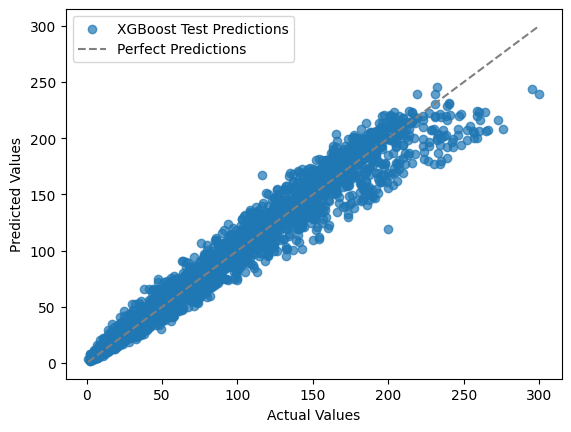

In [ ]:
# Scatter plot for XGBoost predictions
plt.scatter(Y_test, test_data_predictionXGB, label='XGBoost Test Predictions', alpha=0.7)

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

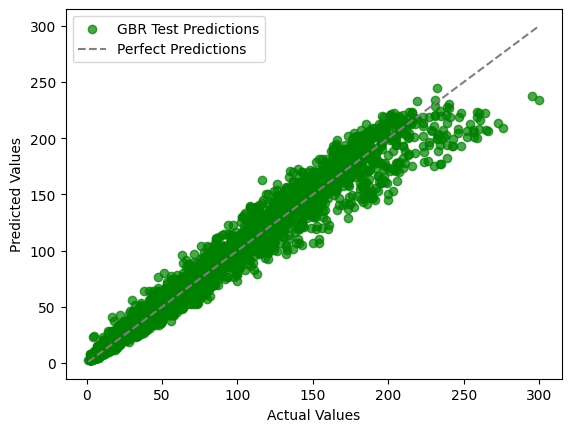

In [ ]:
# Scatter plot for Gradient Boosting predictions
plt.scatter(Y_test, test_data_predictionGBR, label='GBR Test Predictions', alpha=0.7, color='green')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

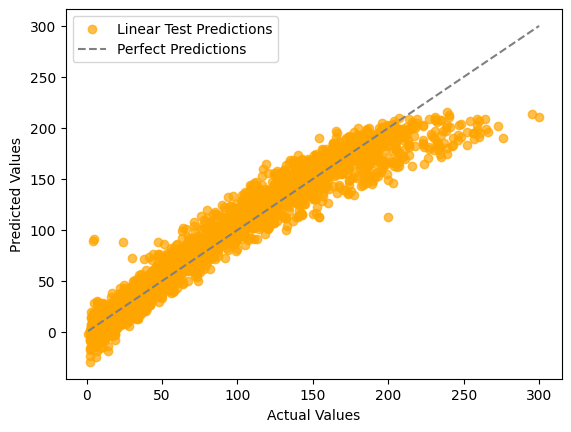

In [ ]:
# Scatter plot for Linear Regression predictions
plt.scatter(Y_test, test_data_predictionLinear, label='Linear Test Predictions', alpha=0.7, color='orange')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

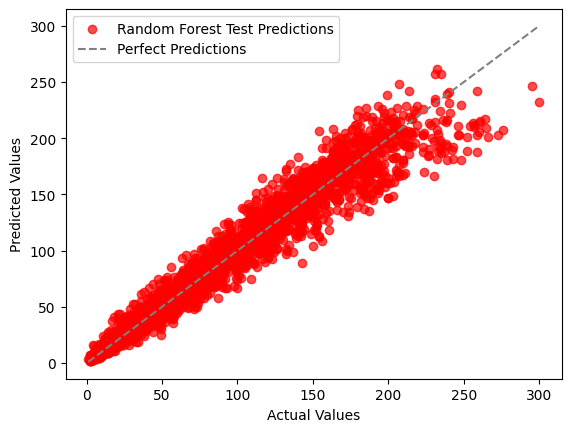

In [ ]:
# Scatter plot for Random Forest Regression predictions
plt.scatter(Y_test, test_data_predictionRF, label='Random Forest Test Predictions', alpha=0.7, color='red')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

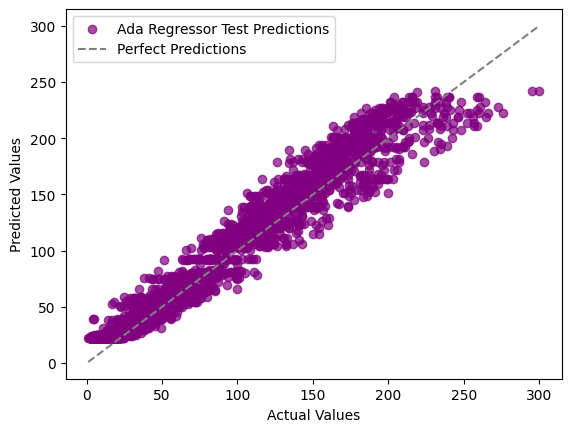

In [ ]:
# Scatter plot for Ada Boost Regression predictions
plt.scatter(Y_test, test_data_predictionAda, label='Ada Regressor Test Predictions', alpha=0.7, color='purple')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

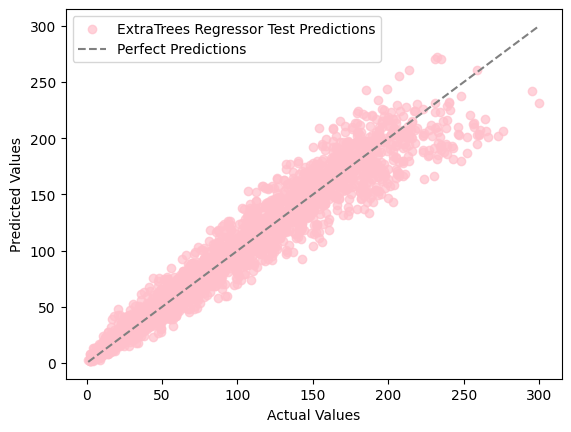

In [ ]:
# Scatter plot for Ada Boost Regression predictions
plt.scatter(Y_test, test_data_predictionExtraTrees, label='ExtraTrees Regressor Test Predictions', alpha=0.7, color='pink')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

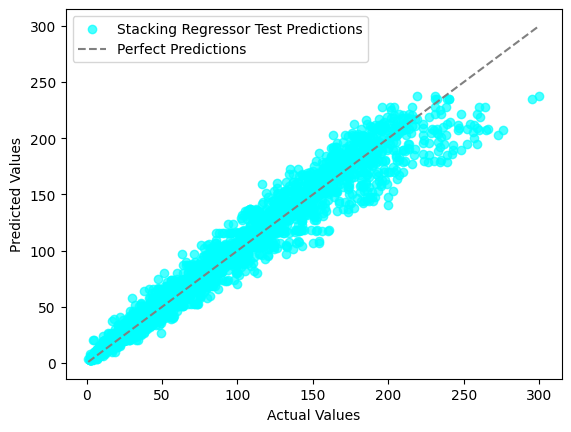

In [ ]:
# Scatter plot for Stacking Regression predictions
plt.scatter(Y_test, test_data_predictionStacking, label='Stacking Regressor Test Predictions', alpha=0.7, color='cyan')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Prediction on Test Data

test_data_predictionXGB = modelXGB.predict(X_test)
train_data_predictionXGB = modelXGB.predict(X_train)

test_data_predictionGBR = modelGBR.predict(X_test)
train_data_predictionGBR = modelGBR.predict(X_train)

test_data_predictionLinear = modelLinear.predict(X_test)
train_data_predictionLinear = modelLinear.predict(X_train)

test_data_predictionRF = modelRF.predict(X_test)
train_data_predictionRF = modelRF.predict(X_train)

test_data_predictionAda = modelAda.predict(X_test)
train_data_predictionAda = modelAda.predict(X_train)

test_data_predictionExtraTrees = modelExtraTrees.predict(X_test)
train_data_predictionExtraTrees = modelExtraTrees.predict(X_train)

test_data_predictionStacking = modelStacking.predict(X_test)
train_data_predictionStacking = modelStacking.predict(X_train)

# Mean Absolute Error
maeXGB = metrics.mean_absolute_error(Y_test, test_data_predictionXGB)
maeGBR = metrics.mean_absolute_error(Y_test, test_data_predictionGBR)
maeLinear = metrics.mean_absolute_error(Y_test, test_data_predictionLinear)
maeRF = metrics.mean_absolute_error(Y_test, test_data_predictionRF)
maeAda = metrics.mean_absolute_error(Y_test, test_data_predictionAda)
maeExtraTrees = metrics.mean_absolute_error(Y_test, test_data_predictionExtraTrees)
maeStacking = metrics.mean_absolute_error(Y_test, test_data_predictionStacking)

# Mean Squared Error
mseXGB = metrics.mean_squared_error(Y_test, test_data_predictionXGB)
mseGBR = metrics.mean_squared_error(Y_test, test_data_predictionGBR)
mseLinear = metrics.mean_squared_error(Y_test, test_data_predictionLinear)
mseRF = metrics.mean_squared_error(Y_test, test_data_predictionRF)
mseAda = metrics.mean_squared_error(Y_test, test_data_predictionAda)
mseExtraTrees = metrics.mean_squared_error(Y_test, test_data_predictionExtraTrees)
mseStacking = metrics.mean_squared_error(Y_test, test_data_predictionStacking)

# Root Mean Squared Error
rmseXGB = np.sqrt(mseXGB)
rmseGBR = np.sqrt(mseGBR)
rmseLinear = np.sqrt(mseLinear)
rmseRF = np.sqrt(mseRF)
rmseAda = np.sqrt(mseAda)
rmseExtraTrees = np.sqrt(mseExtraTrees)
rmseStacking = np.sqrt(mseStacking)

# R-Squared
r2scoreXGB_test = metrics.r2_score(Y_test, test_data_predictionXGB)
r2scoreGBR_test = metrics.r2_score(Y_test, test_data_predictionGBR)
r2scoreLinear_test = metrics.r2_score(Y_test, test_data_predictionLinear)
r2scoreRF_test = metrics.r2_score(Y_test, test_data_predictionRF)
r2scoreAda_test = metrics.r2_score(Y_test, test_data_predictionAda)
r2scoreExtraTrees_test = metrics.r2_score(Y_test, test_data_predictionExtraTrees)
r2scoreStacking_test = metrics.r2_score(Y_test, test_data_predictionStacking)
